### Name    : Reena Rajendra Prasad
### Project  : Term Deposit Sale
### GitHub  : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/Ensemble%20Project%20-ReenaRajendraPrasad-%20Final.ipynb


####  Context
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Attribute Description 

1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [52]:
#Read data from csv
dfBank = pd.read_csv('bank-full.csv')

#### Deliverable – 1
##### Univariate Analysis

In [53]:
#Read  Data 
dfBank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [54]:
#Read Tail Data 
dfBank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [55]:
#The Sahpe of dataset for  identifying the number of rows and columns
dfBank.shape

(45211, 17)

In [56]:
# Info  to identify  the name of columns , presence of null values and Datatypes
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [57]:
#Check Null Values 
dfBank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

#### In sights 
No null values in the dataset

In [58]:
#To check the Central Tendency and  the Range for the numerical columns
dfBank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.00,40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,45211.00,1362.27,3044.77,-8019.00,72.00,448.00,1428.00,102127.00
day,45211.00,15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,45211.00,258.16,257.53,0.00,103.00,180.00,319.00,4918.00
campaign,45211.00,2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,45211.00,40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,45211.00,0.58,2.30,0.00,0.00,0.00,0.00,275.00


### Insights
#### .Higly skewed data on balance & duration 

#### .Balance can be Negative  , but can be scaled 

In [59]:
# Binning The Age  
bin_edge=[0,20,30,40,50,60,70,80,90,100]
bin_labels=['<=20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
dfBank['age']=pd.cut(dfBank['age'],bins=bin_edge, labels=bin_labels)
dfBank['age'].unique()

[50-60, 40-50, 30-40, 20-30, 60-70, <=20, 80-90, 70-80, 90-100]
Categories (9, object): [<=20 < 20-30 < 30-40 < 40-50 ... 60-70 < 70-80 < 80-90 < 90-100]

In [60]:
dfBank.dtypes

age          category
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
Target         object
dtype: object

In [61]:
#Convert Oject to Category 
for col in dfBank.columns[dfBank.dtypes=='object']:
    dfBank[col]=dfBank[col].astype('category')

In [62]:
#Verify the Type
dfBank.dtypes

age          category
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

### Count Plots for the Categorical Variables

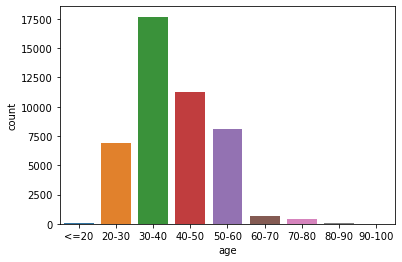

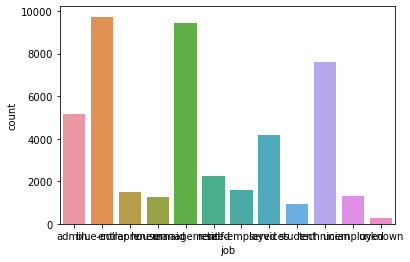

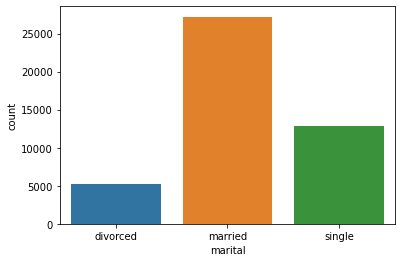

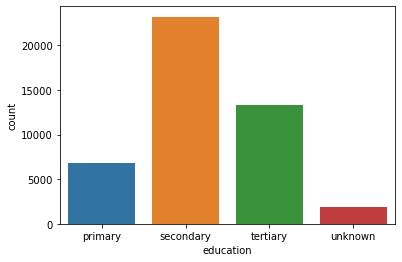

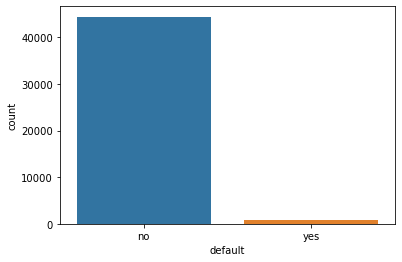

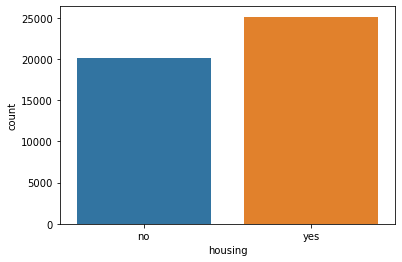

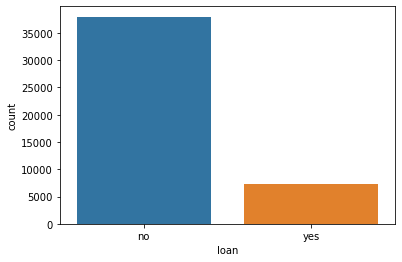

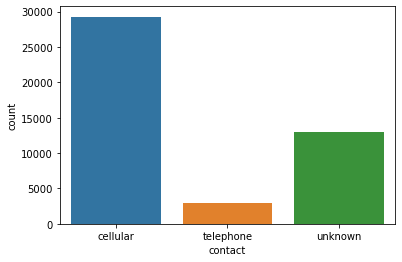

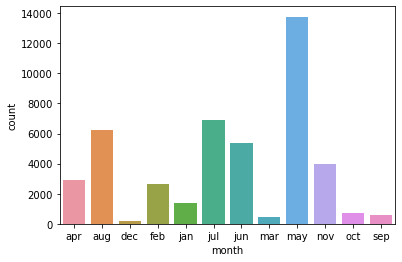

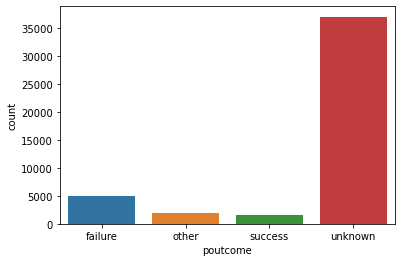

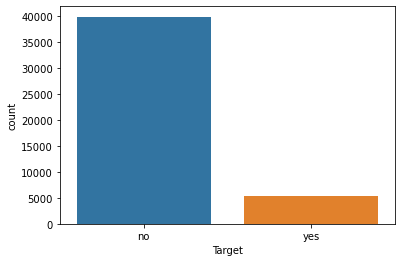

In [63]:
for col in dfBank.columns[dfBank.dtypes=='category']:
    sns.countplot(dfBank[col])
    plt.show()

In [64]:
#Unique values for each Catgorical columns
pd.options.display.float_format = '{:.2f}'.format
for col in dfBank.columns[dfBank.dtypes=='category']:
    print('=============='+ col +'==================')
    print(dfBank[col].value_counts(normalize=True))
    print('================================')

==============age==================
30-40    0.39
40-50    0.25
50-60    0.18
20-30    0.15
60-70    0.02
70-80    0.01
<=20     0.00
80-90    0.00
90-100   0.00
Name: age, dtype: float64
==============job==================
blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64
==============marital==================
married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64
==============education==================
secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64
==============default==================
no    0.98
yes   0.02
Name: default, dtype: float64
==============housing==================
yes   0.56
no    0.44
Name: housing, dtype: float64
==============loan==================
no    0.84
yes   

### Insights
#### .The Target variable is   unbalanced  which might affect the model performance 

#### .Unknown values in Job, Education,Outcome of previous campaign,Contact method

### Distplot for continuous variable 

Skewness of balance 8.360308326166326


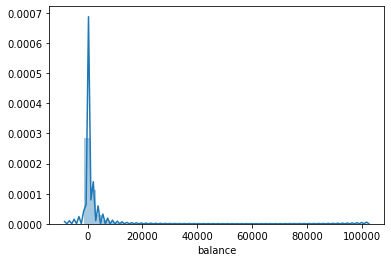

Skewness of day 0.09307901402122411


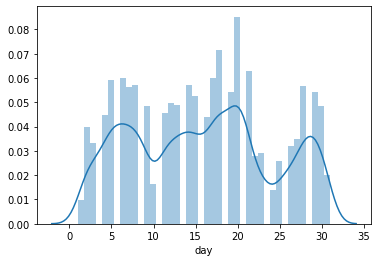

Skewness of duration 3.144318099423456


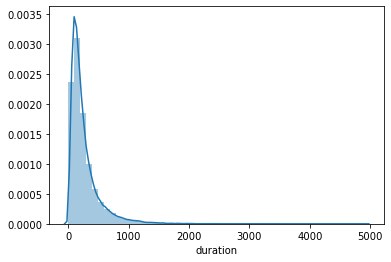

Skewness of campaign 4.898650166179674


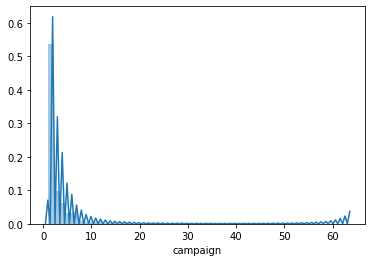

Skewness of pdays 2.6157154736563477


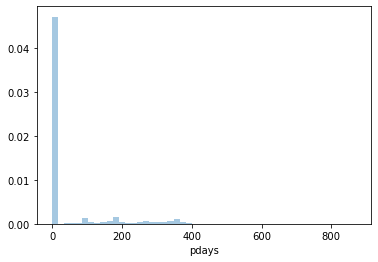

Skewness of previous 41.84645447266292


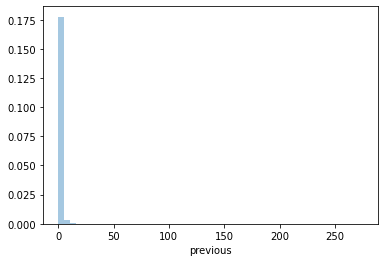

In [65]:
for col in dfBank.columns[dfBank.dtypes!='category']:
    sns.distplot(dfBank[col])
    print('Skewness of '+ col ,dfBank[col].skew())
    plt.show()

#### Bivariate Analysis 

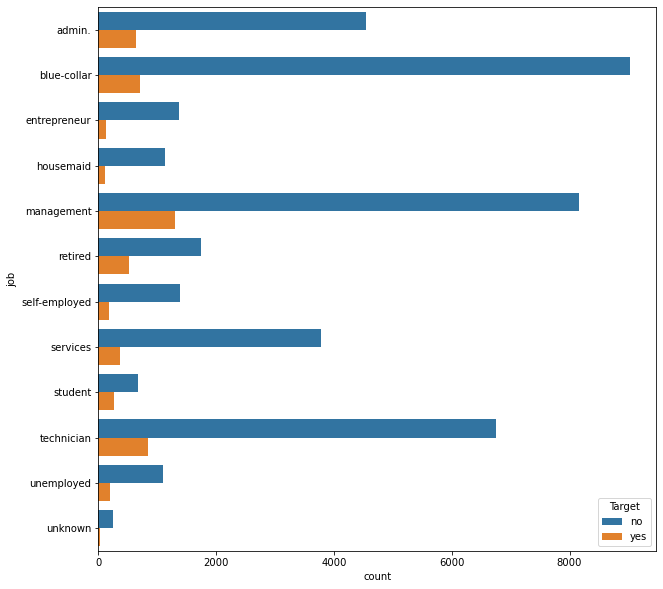

In [66]:
#Relation between job and target variable
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(y= dfBank['job'],hue=dfBank['Target'])
# dfBank.dtypes

### Insights 
More term Deposit Subscription are done by people in the management position , This variable should be used for the model to maximise term subscription 

In [67]:

#Relation between target and education
dfBank.groupby('education')['Target'].value_counts(normalize=True)

education  Target
primary    no       0.91
           yes      0.09
secondary  no       0.89
           yes      0.11
tertiary   no       0.85
           yes      0.15
unknown    no       0.86
           yes      0.14
Name: Target, dtype: float64

#### Insight :  
The Target variable shows the same pattern  among the 4 categories in education,
I don't think it is good to replace unknown with -1 , but treat it as a different category 

In [68]:
#Relation between target and pOutcome
dfBank.groupby('poutcome')['Target'].value_counts(normalize=True)

poutcome  Target
failure   no       0.87
          yes      0.13
other     no       0.83
          yes      0.17
success   yes      0.65
          no       0.35
unknown   no       0.91
          yes      0.09
Name: Target, dtype: float64

### Insights 
If the pOutcome is success the rate of Term deposit subscription is higher  , this avriable will help in the model building 

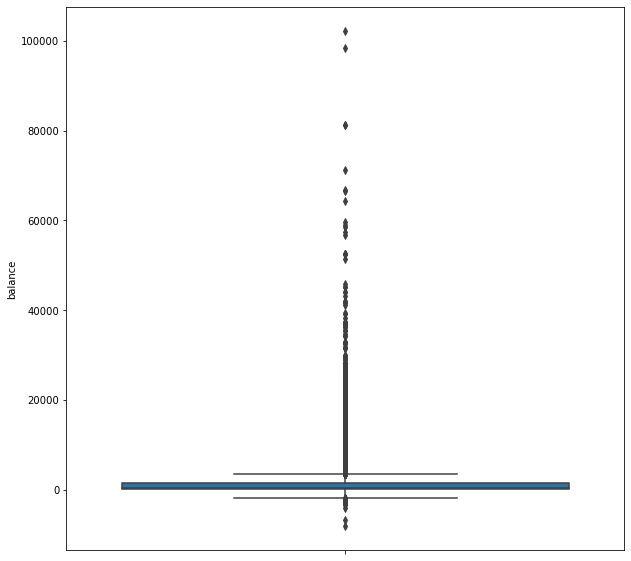

In [69]:
#find out  Relation between balance and  Target variable
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot( y="balance", data=dfBank, hue='Target')

### Insights
Highly skewed data on the  account balance
Will try to model after  treating outliers with mean imputation an compare  to dataset without outlier treatment


### Outliers 

In [70]:
#InterQuartile Range  for each numerical columns
Q1=dfBank.quantile(q=0.25)
Q3=dfBank.quantile(q=0.75)
IQR=Q3-Q1
print(IQR)

balance    1356.00
day          13.00
duration    216.00
campaign      2.00
pdays         0.00
previous      0.00
dtype: float64


In [71]:
# Outliers 
numcols=dfBank.columns[dfBank.dtypes=='int64']
npout=np.where((dfBank[numcols]<(Q1-1.5*IQR))| (dfBank[numcols]>(Q3+1.5*IQR)))

In [72]:
len(npout[0]),len(npout[1])

(27542, 27542)

### Using Zscore for Outliers  Replacement with Median and later test this with the Logistic Regression 

In [73]:


from scipy import stats
z = np.abs(stats.zscore(dfBank[numcols]))   # get the z-score of every value with respect to their columns
print(z)

[[0.25641925 1.29847633 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.43789469 1.29847633 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.44676247 1.29847633 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [1.42959305 0.14341818 3.37379688 0.72181052 1.43618859 1.05047333]
 [0.22802402 0.14341818 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.52836436 0.14341818 0.39932797 0.24656035 1.4761376  4.52357654]]


In [74]:
#Copy of Original Dataset
dfBank_z= dfBank.copy()

# Threshold value of Zscore 
threshold =3

#Store Medians in a list  for replacement of outlier
col_med =dfBank.median()


In [75]:
col_med

balance    448.00
day         16.00
duration   180.00
campaign     2.00
pdays       -1.00
previous     0.00
dtype: float64

In [76]:

## Modify the Outliers and replace it for the Median
for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):
    dfBank_z.loc[i,numcols[j]] = col_med[numcols[j]]

In [77]:
#check data
dfBank_z.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,50-60,management,married,tertiary,no,2143.00,yes,no,unknown,5,may,261.00,1.00,-1.00,0.00,unknown,no
1,40-50,technician,single,secondary,no,29.00,yes,no,unknown,5,may,151.00,1.00,-1.00,0.00,unknown,no
2,30-40,entrepreneur,married,secondary,no,2.00,yes,yes,unknown,5,may,76.00,1.00,-1.00,0.00,unknown,no
3,40-50,blue-collar,married,unknown,no,1506.00,yes,no,unknown,5,may,92.00,1.00,-1.00,0.00,unknown,no
4,30-40,unknown,single,unknown,no,1.00,no,no,unknown,5,may,198.00,1.00,-1.00,0.00,unknown,no
5,30-40,management,married,tertiary,no,231.00,yes,no,unknown,5,may,139.00,1.00,-1.00,0.00,unknown,no
6,20-30,management,single,tertiary,no,447.00,yes,yes,unknown,5,may,217.00,1.00,-1.00,0.00,unknown,no
7,40-50,entrepreneur,divorced,tertiary,yes,2.00,yes,no,unknown,5,may,380.00,1.00,-1.00,0.00,unknown,no
8,50-60,retired,married,primary,no,121.00,yes,no,unknown,5,may,50.00,1.00,-1.00,0.00,unknown,no
9,40-50,technician,single,secondary,no,593.00,yes,no,unknown,5,may,55.00,1.00,-1.00,0.00,unknown,no


####  Normalize the  numerical  columns using StandardScaler  for Logistic Regression algorithm (Only in the second Datset for comparison -dfBank_z)

In [78]:
from sklearn.preprocessing import  StandardScaler
stscale=StandardScaler()

for col in numcols:    
    dfBank_z[col] =stscale.fit_transform(dfBank_z[[col]])

In [79]:
dfBank_z.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,50-60,management,married,tertiary,no,0.63,yes,no,unknown,-1.30,may,0.15,-0.75,-0.37,-0.37,unknown,no
1,40-50,technician,single,secondary,no,-0.61,yes,no,unknown,-1.30,may,-0.43,-0.75,-0.37,-0.37,unknown,no
2,30-40,entrepreneur,married,secondary,no,-0.63,yes,yes,unknown,-1.30,may,-0.83,-0.75,-0.37,-0.37,unknown,no
3,40-50,blue-collar,married,unknown,no,0.25,yes,no,unknown,-1.30,may,-0.74,-0.75,-0.37,-0.37,unknown,no
4,30-40,unknown,single,unknown,no,-0.63,no,no,unknown,-1.30,may,-0.18,-0.75,-0.37,-0.37,unknown,no


In [80]:
dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,50-60,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,40-50,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,30-40,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,40-50,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,30-40,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


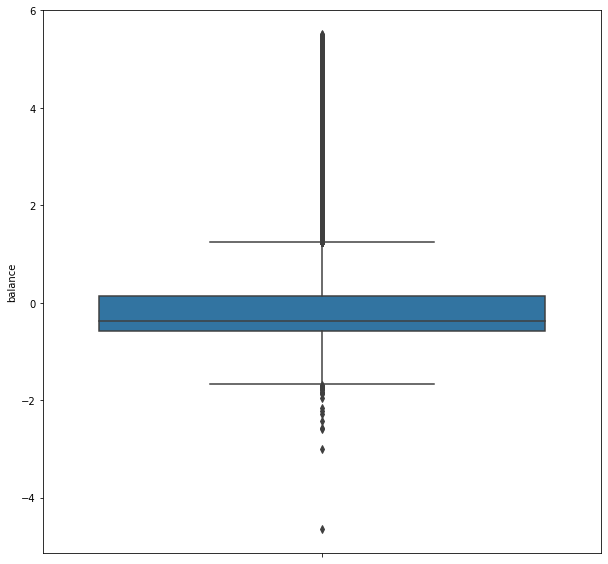

In [81]:
#find out  Relation between balance and  Target variable  on a outlier treated dataframe
fig,ax= plt.subplots(figsize=(10,10))
sns.boxplot( y="balance", data=dfBank_z, hue='Target')


In [82]:
#relation beween Loan default and Target variable
pd.crosstab(dfBank['default'],dfBank['Target'])

Target,no,yes
default,,
no,39159,5237
yes,763,52


### Insights
Customers who accepted the Term deposits have less loan defaults , Which definitely is a  variable that should be considered for modelling 

In [83]:
#relation beween Loan default and Target variable
pd.crosstab(dfBank['housing'],dfBank['Target'])

Target,no,yes
housing,,
no,16727,3354
yes,23195,1935


In [84]:
#relation beween Loan default and Target variable
pd.crosstab(dfBank['loan'],dfBank['Target'])

Target,no,yes
loan,,
no,33162,4805
yes,6760,484


Insights
Customers who accepted the Term deposits have less loan defaults , Which definitely is a variable that should be considered for modelling

In [85]:
replaceStruct={"Target":{"yes":1,"no":0},
               "age":{"<=20":1,"20-30":2,"30-40":3 ,"40-50":4,"50-60":5 ,"60-70":7,"70-80":8,"80-90":9,"90-100":10},
               "default":{"yes":1,"no":0},
               "housing":{"yes":1,"no":0},
               "loan":{"yes":1,"no":0},
               "education":{"primary":1,"secondary":2,"secondary":3,"tertiary":4,"unknown":5}, 
               "poutcome":{"failure":1,"success":2,"unknown":-1,"other":-1},
              }

dfBank=dfBank.replace(replaceStruct)
dfBank_z=dfBank_z.replace(replaceStruct)



In [86]:
dfBank.corr()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
age,1.00,-0.13,-0.02,0.10,-0.18,-0.02,-0.01,-0.00,0.00,-0.02,0.01,0.03,0.04
education,-0.13,1.00,-0.01,0.05,-0.07,-0.03,0.02,0.00,0.00,0.01,0.02,0.04,0.06
default,-0.02,-0.01,1.00,-0.07,-0.01,0.08,0.01,-0.01,0.02,-0.03,-0.02,-0.04,-0.02
balance,0.10,0.05,-0.07,1.00,-0.07,-0.08,0.00,0.02,-0.01,0.00,0.02,0.03,0.05
housing,-0.18,-0.07,-0.01,-0.07,1.00,0.04,-0.03,0.01,-0.02,0.12,0.04,0.02,-0.14
loan,-0.02,-0.03,0.08,-0.08,0.04,1.00,0.01,-0.01,0.01,-0.02,-0.01,-0.04,-0.07
day,-0.01,0.02,0.01,0.00,-0.03,0.01,1.00,-0.03,0.16,-0.09,-0.05,-0.07,-0.03
duration,-0.00,0.00,-0.01,0.02,0.01,-0.01,-0.03,1.00,-0.08,-0.00,0.00,0.01,0.39
campaign,0.00,0.00,0.02,-0.01,-0.02,0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.11,-0.07
pdays,-0.02,0.01,-0.03,0.00,0.12,-0.02,-0.09,-0.00,-0.09,1.00,0.45,0.70,0.10


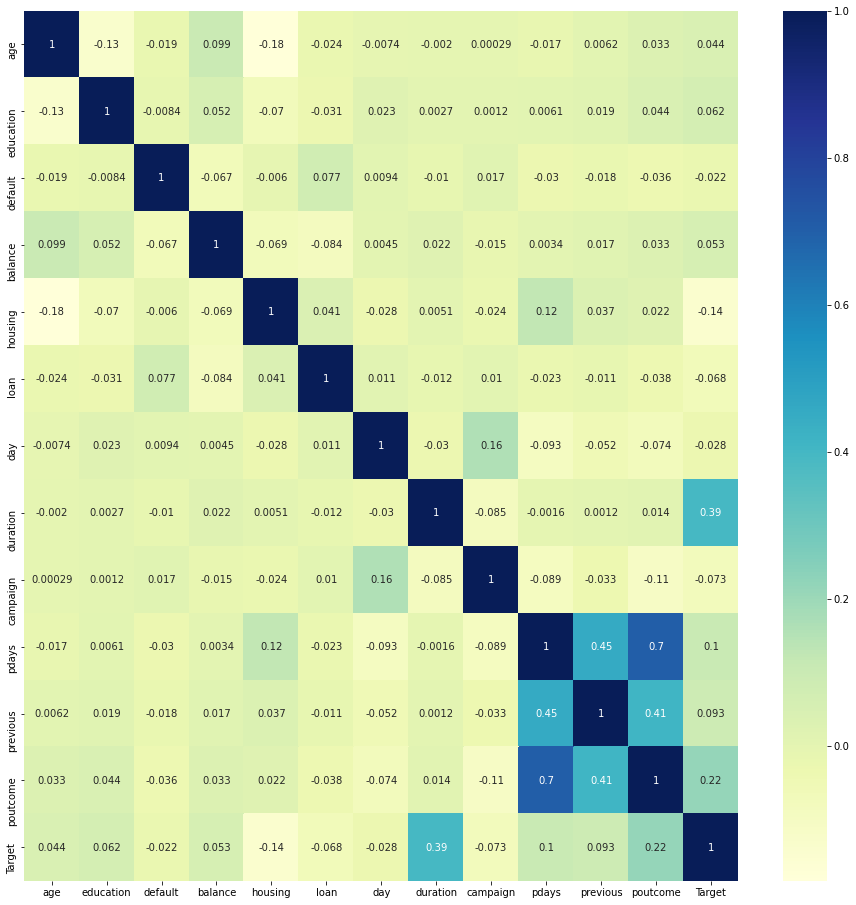

In [87]:
fig,ax = plt.subplots(figsize=(16,16))
sns.heatmap(dfBank.corr(),annot=True,cmap="YlGnBu")

#### Insights
#### comparitvely High Correlation between  pDays and poutcome  .Hesitant to delete since it is not above 0.9
#### Only duration field   and pOutcome shows high correlation with the target variable

### Steps Taken for data pollution
#### 1.Unknown and Other Categories in poutcome is given a lesser prority  with -1
#### 2. The Target variable distribution is almost similar  in all 3 educational categories and unkown category , For this reason unknow n is teated as a separate ctaegory eithout negative value 
#### 3. Outlier Treatment with Zcore is  tested on a copy of the data to compare the models
#### 4. Scaling of data is done using standard sclaer to see if this will affect the model output

#### 5. The scaled ,Normalized and Outlier treated data is modelled with  Logistic Regression as it is the model affected mostly by outliers


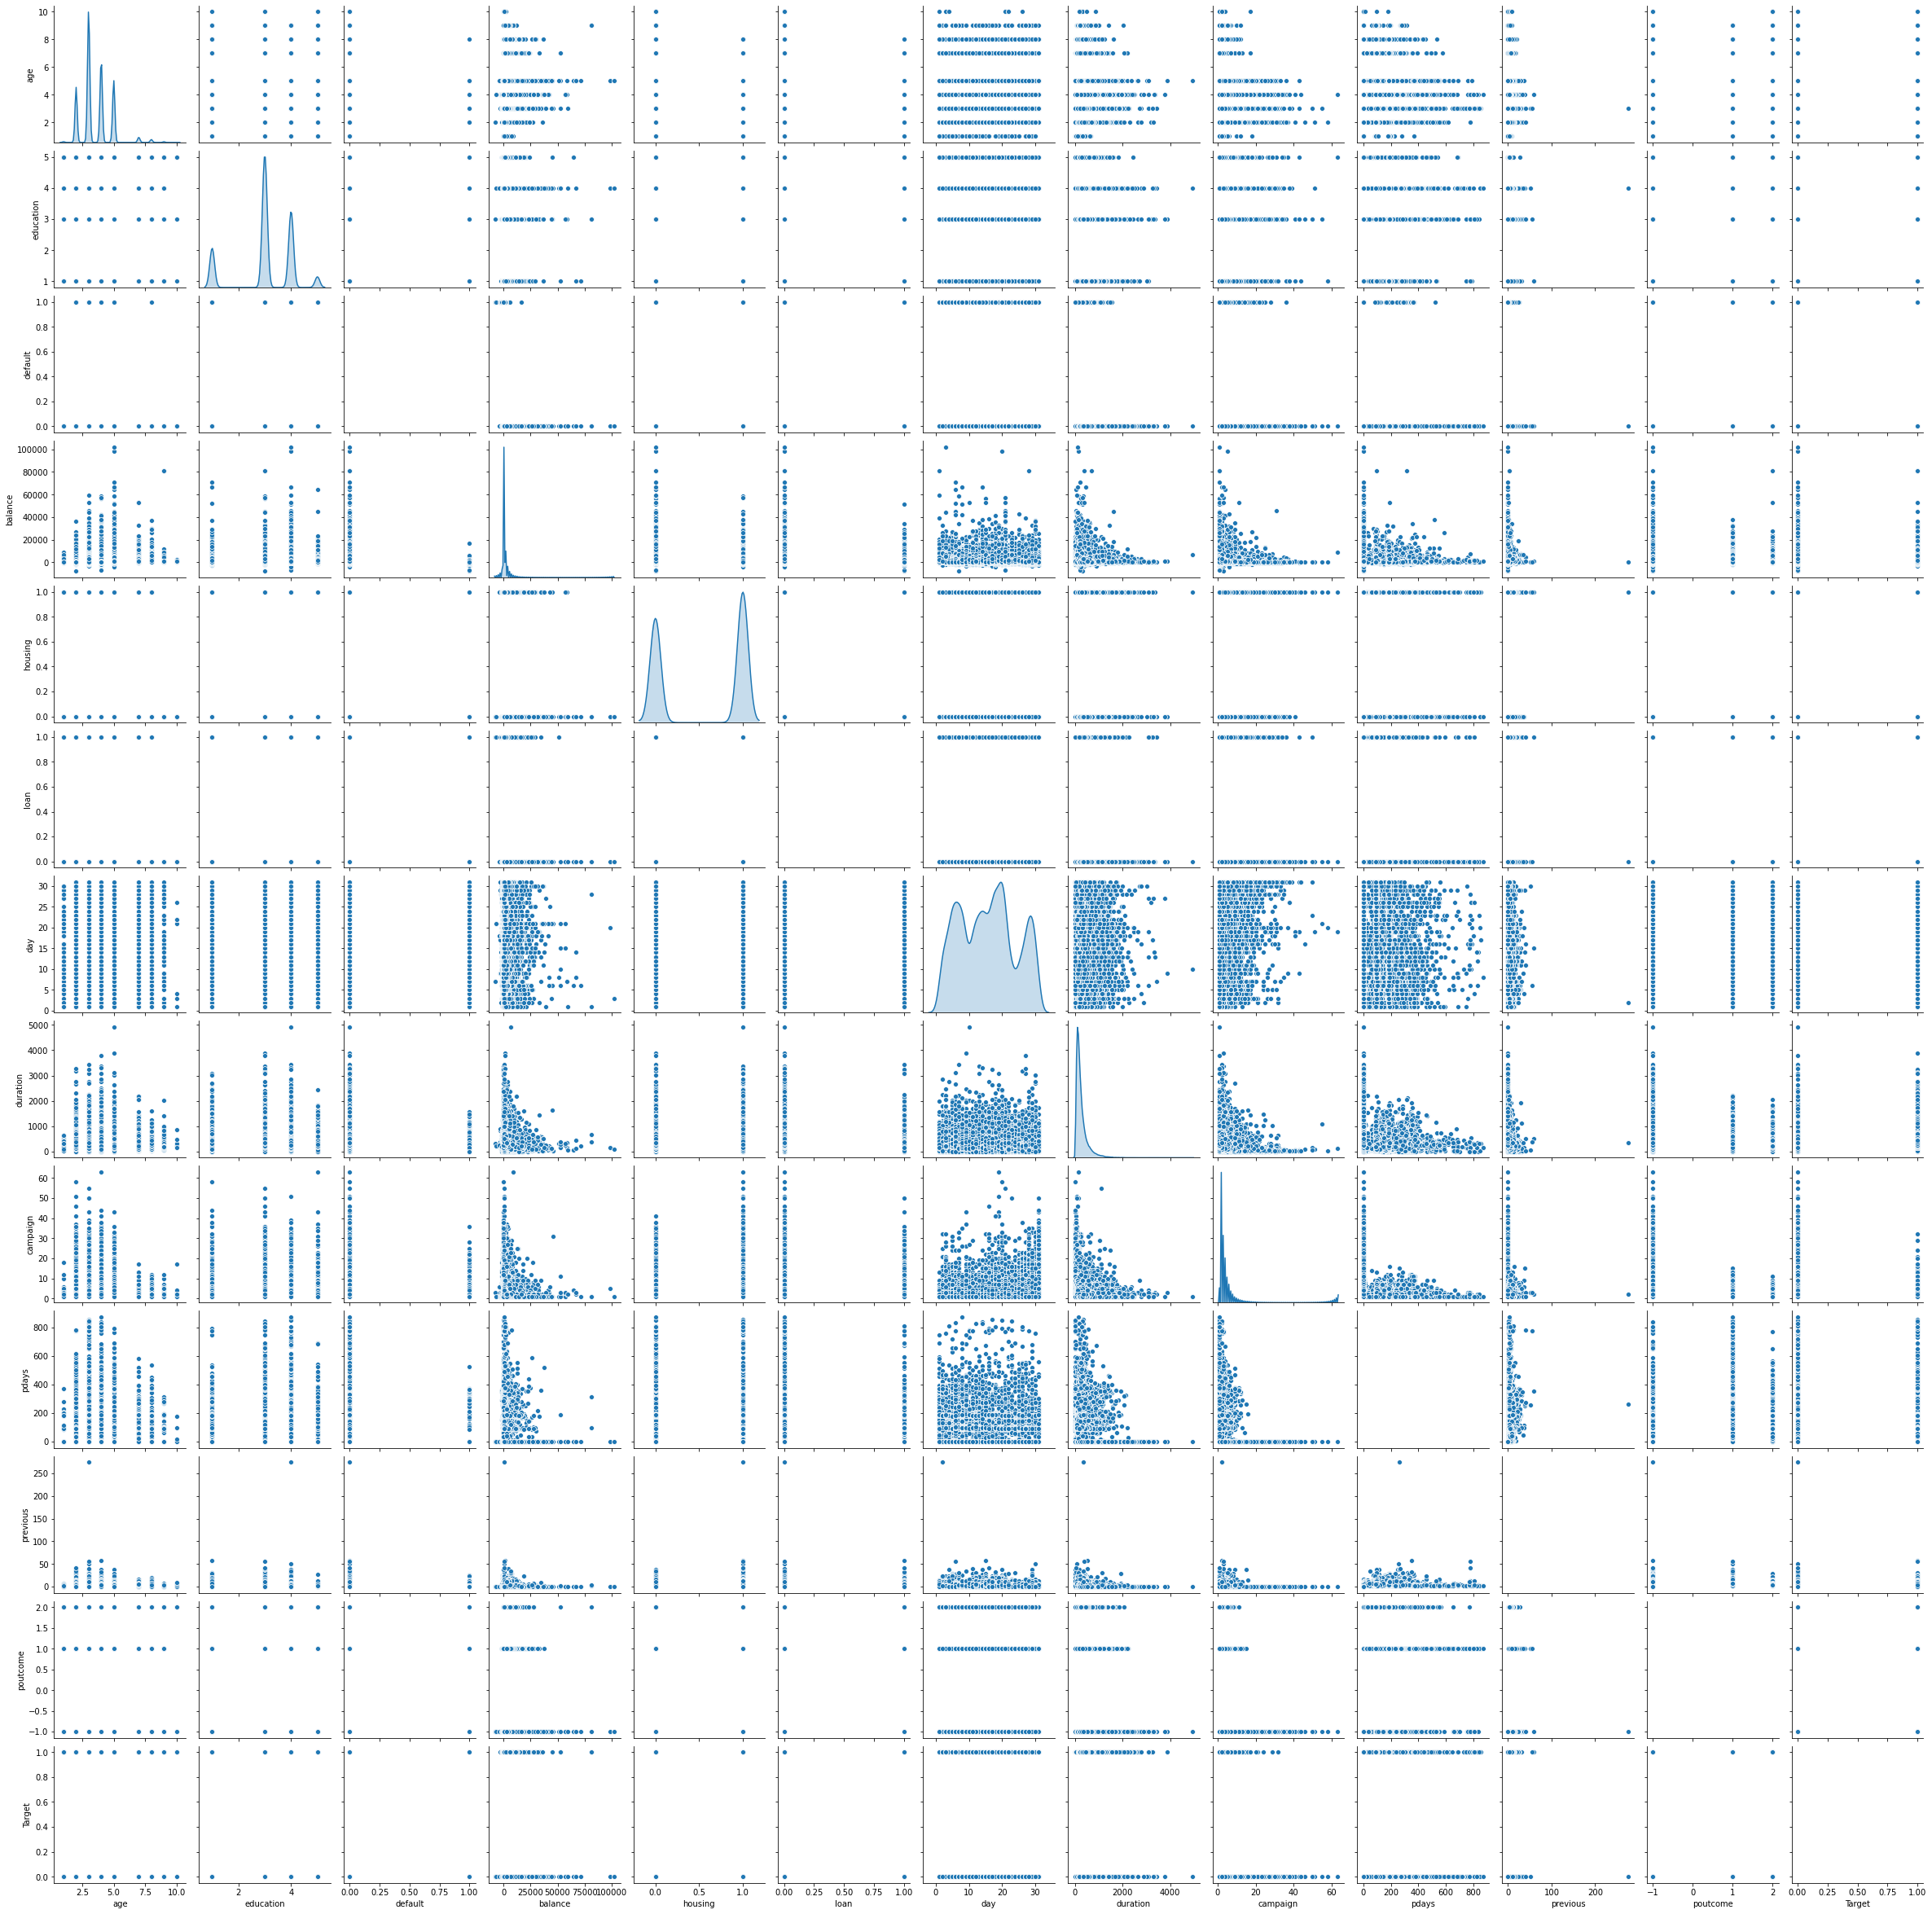

In [88]:
sns.pairplot(dfBank,diag_kind='kde')

### Insights 
No High liner  correlation is find between the variables

### Deliverable – 2 (Prepare the data for analytics)


In [89]:
#1. Check types
dfBank.dtypes

age             int64
job          category
marital      category
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
Target          int64
dtype: object

In [90]:
# Define Xand Y  .
X=dfBank.drop('Target',axis=1)
Y=dfBank[['Target']]


# Define Xand Y  . for data with outlier treatment
X_z=dfBank_z.drop('Target',axis=1)
Y_z=dfBank_z[['Target']]

In [91]:
# Convert categorical variable
X=pd.get_dummies(X,drop_first=True)
X_z=pd.get_dummies(X_z,drop_first=True)

In [92]:
X.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,5,4,0,2143,1,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,4,3,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,3,3,0,2,1,1,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,4,5,0,1506,1,0,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,3,5,0,1,0,0,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [93]:
X.dtypes

age                  int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome             int64
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
job_unknown          uint8
marital_married      uint8
marital_single       uint8
contact_telephone    uint8
contact_unknown      uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
m

In [94]:
#Test and Training Set for  Data (nOt Scaled)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=5)

In [95]:
#Test and Training Set for  the Scaled Data
X_train_z,X_test_z,y_train_z,y_test_z = train_test_split(X_z,Y_z,test_size=0.30, random_state=5)

### Logistic Regression Model  

In [96]:
from sklearn.linear_model import LogisticRegression
lrmdl=LogisticRegression(random_state=42,penalty='l1', C = 0.75 , solver="liblinear",class_weight='balanced')
#Fit Logistic Regression model
lrmdl.fit(X_train,y_train)
#Predict Y values on Test
y_predict = lrmdl.predict(X_test)

#Training score
train_score =lrmdl.score(X_train,y_train)
#testing score 
test_score =lrmdl.score(X_test,y_test)

print(train_score,test_score)

0.8349290612064335 0.8358153936891772


In [97]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] ,cmap='Greens')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()


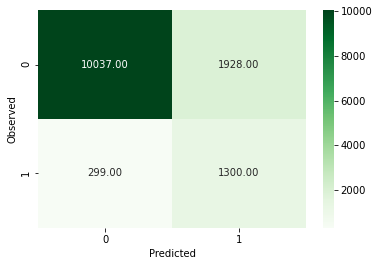

In [98]:
draw_cm(y_test,y_predict)

In [99]:
#Evaluvation marix 

recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)

roc_auc = roc_auc_score(y_test, y_predict)

In [100]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83


### Logistic Regression Model On Noramlized Outlier Treated data

In [101]:
#Fit Logistic Regression model on the NormalisedData

lrmdlz=LogisticRegression(random_state=42,penalty='l1', C = 0.75 , solver="liblinear",class_weight='balanced' )
lrmdlz.fit(X_train_z,y_train_z)
#Predict Y values on Test
y_predict_z = lrmdlz.predict(X_test_z)

#Training score
train_score =lrmdlz.score(X_train_z,y_train_z)
#testing score 
test_score =lrmdlz.score(X_test_z,y_test_z)

print(train_score,test_score)

0.8039624608967675 0.8061043939840755


In [102]:
#Evaluvation marix 
recall=recall_score(y_test_z,y_predict_z)

prec=precision_score(y_test_z,y_predict_z)


f1=f1_score(y_test_z,y_predict_z)


accuracy=accuracy_score(y_test_z,y_predict_z)
roc_auc = roc_auc_score(y_test_z, y_predict_z)

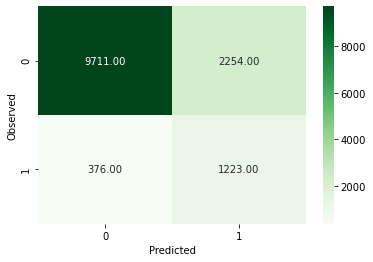

In [105]:
draw_cm(y_test_z,y_predict_z)

In [106]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression-Scaled-Outlier Treated Data'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83


#### Scaling of Data did not help  in  improving  any of the evaluvation matrix in this context

### Hyper parameters for Logistic Regression using gridserch CV


In [107]:
from sklearn.model_selection import GridSearchCV


C = [0.01,0.1,0.25,0.5,0.75,1]


hyperparameters = {'class_weight':['none','balanced'],'C':C,'penalty': ['l1'], 'solver': [ 'liblinear', 'saga']}, {'class_weight':['none','balanced'],'penalty': ['l2'], 'solver': ['sag', 'lbfgs', 'newton-cg']}


logistic = LogisticRegression()

final_model = GridSearchCV(logistic, hyperparameters, verbose=0)
final_model.fit(X_train,y_train)


#Training score
train_score =final_model.score(X_train,y_train)
#testing score 
test_score =final_model.score(X_test,y_test)

y_predict = final_model.predict(X_test)


In [108]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)
print(train_score,test_score)

0.8977154232628686 0.9003243880861103


In [109]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression - Hyper param'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65


### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtreeMdl =  DecisionTreeClassifier(criterion='gini',max_depth=5)
#Fit Decision Tree Model
dtreeMdl.fit(X_train,y_train)
#Predict Y values on Test
y_predict = dtreeMdl.predict(X_test)

#Training score
train_score =dtreeMdl.score(X_train,y_train)
#testing score 
test_score =dtreeMdl.score(X_test,y_test)

print(train_score,test_score)


0.9042247290422473 0.9020937776467118


In [111]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

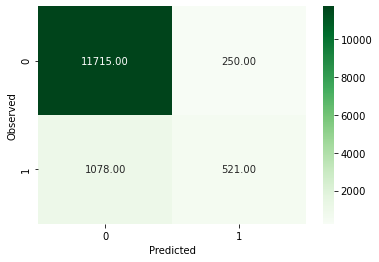

In [112]:
draw_cm(y_test,y_predict)

In [113]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65


## Deliverable – 3  Ensemble Models

### Bagging Classifier

In [114]:
from sklearn.ensemble import BaggingClassifier
mdlBg= BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)

# Fit bagging classifier
mdlBg.fit(X_train,y_train)
#Predict Y values on Test
y_predict = mdlBg.predict(X_test)

#Training score
train_score =mdlBg.score(X_train,y_train)
#testing score 
test_score =mdlBg.score(X_test,y_test)

print(train_score,test_score)

0.9938698770815559 0.9048215865526393


In [115]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

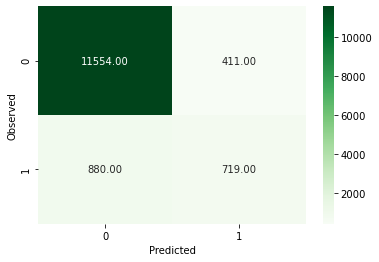

In [116]:
draw_cm(y_test,y_predict)

In [117]:
tempResultsDf =pd.DataFrame({'Method':['Bagging Classifier'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
0,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
mdlRnd= RandomForestClassifier(n_estimators=50, random_state=22)

# Fit bagging classifier
mdlRnd.fit(X_train,y_train)
#Predict Y values on Test
y_predict = mdlRnd.predict(X_test)

#Training score
train_score =mdlRnd.score(X_train,y_train)
#testing score 
test_score =mdlRnd.score(X_test,y_test)

print(train_score,test_score)

0.9997788099977881 0.9074019463285167


In [119]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

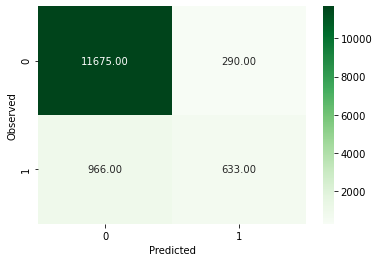

In [120]:
draw_cm(y_test,y_predict)

In [121]:
tempResultsDf =pd.DataFrame({'Method':['Random Forest'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
0,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71
0,Random Forest,1.00,0.91,0.69,0.40,0.50,0.91,0.69


### Adaptive Boosting

In [122]:
from sklearn.ensemble import AdaBoostClassifier
mdlAda= AdaBoostClassifier(n_estimators=50,learning_rate=0.1, random_state=25)

# Fit bagging classifier
mdlAda.fit(X_train,y_train)
#Predict Y values on Test
y_predict = mdlAda.predict(X_test)

#Training score
train_score =mdlAda.score(X_train,y_train)
#testing score 
test_score =mdlAda.score(X_test,y_test)

print(train_score,test_score)

0.888551837456947 0.8891182542023002


In [123]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

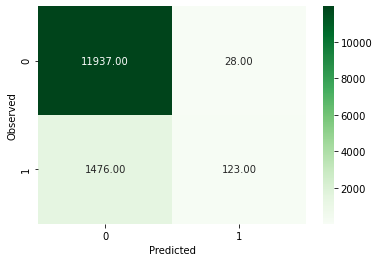

In [124]:
draw_cm(y_test,y_predict)

In [125]:
tempResultsDf =pd.DataFrame({'Method':['Ada Boost'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
0,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71
0,Random Forest,1.00,0.91,0.69,0.40,0.50,0.91,0.69
0,Ada Boost,0.89,0.89,0.81,0.08,0.14,0.89,0.54


### Gradiant Boosting 

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
mdlGrad= GradientBoostingClassifier(n_estimators=70,learning_rate=0.1, random_state=28)

# Fit bagging classifier
mdlGrad.fit(X_train,y_train)
#Predict Y values on Test
y_predict = mdlGrad.predict(X_test)

#Training score
train_score =mdlGrad.score(X_train,y_train)
#testing score 
test_score =mdlGrad.score(X_test,y_test)

print(train_score,test_score)

0.9082693462255506 0.9064435269831908


In [127]:
#Evaluvation marix 
recall=recall_score(y_test,y_predict)

prec=precision_score(y_test,y_predict)

f1=f1_score(y_test,y_predict)

accuracy=accuracy_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)

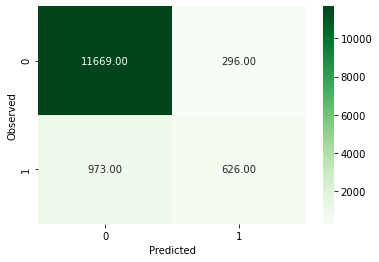

In [128]:
draw_cm(y_test,y_predict)

In [129]:
tempResultsDf = pd.DataFrame({'Method':['Gradient boost'], 'Train Score':train_score, 'Test Score': test_score ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
0,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71
0,Random Forest,1.00,0.91,0.69,0.40,0.50,0.91,0.69
0,Ada Boost,0.89,0.89,0.81,0.08,0.14,0.89,0.54
0,Gradient boost,0.91,0.91,0.68,0.39,0.50,0.91,0.68


#### XgBoost

In [130]:
import xgboost as xgb

In [131]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3, 
    'objective': 'multi:softprob',
    'num_class': 3}

model_xgb = xgb.train(param, D_train)

pred_xgb = model_xgb.predict(D_test)
preds_xgb_final = np.asarray([np.argmax(line) for line in pred_xgb])
#Evaluvation marix 
recall=recall_score(y_test,preds_xgb_final)

prec=precision_score(y_test,preds_xgb_final)

f1=f1_score(y_test,preds_xgb_final)

accuracy=accuracy_score(y_test,preds_xgb_final)
roc_auc = roc_auc_score(y_test, preds_xgb_final)

In [132]:
tempResultsDf = pd.DataFrame({'Method':['XgBoost'], 'Train Score':0, 'Test Score': 0 ,'Precision':prec,'Recall':recall ,'F1':f1, 'accuracy': accuracy ,'ROCAUC':roc_auc})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score','Test Score','Precision','Recall','F1','accuracy','ROCAUC']]
resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
0,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
0,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
0,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71
0,Random Forest,1.00,0.91,0.69,0.40,0.50,0.91,0.69
0,Ada Boost,0.89,0.89,0.81,0.08,0.14,0.89,0.54
0,Gradient boost,0.91,0.91,0.68,0.39,0.50,0.91,0.68
0,XgBoost,0.00,0.00,0.71,0.27,0.39,0.90,0.63


### 3. Compare various Model scores in a Dataframe

In [141]:
#Sorting Based on Recall as  Recall is the important merics to reduce the False Nagatives

resultsDf=resultsDf.sort_values('Recall',ascending=False).reset_index(drop=True)

resultsDf

,Method,Train Score,Test Score,Precision,Recall,F1,accuracy,ROCAUC
0,Logistic Regression,0.83,0.84,0.40,0.81,0.54,0.84,0.83
1,Logistic Regression-Scaled-Outlier Treated Data,0.80,0.81,0.35,0.76,0.48,0.81,0.83
2,Bagging Classifier,0.99,0.90,0.64,0.45,0.53,0.90,0.71
3,Random Forest,1.00,0.91,0.69,0.40,0.50,0.91,0.69
4,Gradient boost,0.91,0.91,0.68,0.39,0.50,0.91,0.68
5,Logistic Regression - Hyper param,0.90,0.90,0.66,0.33,0.44,0.90,0.65
6,Decision Tree,0.90,0.90,0.68,0.33,0.44,0.90,0.65
7,XgBoost,0.00,0.00,0.71,0.27,0.39,0.90,0.63
8,Ada Boost,0.89,0.89,0.81,0.08,0.14,0.89,0.54


### Conclusion 

### Business Insights

#### Confusion Matrix Description

True Positives (Observed=1 and Predicted=1)
 Predicted that the customer will accept the Term deposit Scheme and the customer accepted
 
True Negatives (Observed=0 and Predicted=0)
 Predicted that the customer will not accept the Term deposit Scheme and the customer did not
 
False Positives (Observed=0 and Predicted=1)
 Predicted that the customer will accept the Term deposit Scheme but the customer did not accept 
 
False Negatives (Observed=1 and Predicted=0)
 Predicted that the customer will not accept the Term deposit Scheme but the customer accepted the Scheme

#### The Context here is  model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

#### In Other terms minimise the False negatives.    Recall is the important evaluvation metrics here  . In the above models "Logistic regression"  has got the higher Recall rate .